Datos Rayos X

Librerias

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

Carga Datos

In [207]:
actividad1=pd.read_csv("Actividad 1.csv",sep=',',encoding='utf-8').drop([0,1])
actividad1=actividad1.apply(pd.to_numeric)
actividad2ambiente=pd.read_csv('Actividad 2 ambiente.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2ambiente=actividad2ambiente.apply(pd.to_numeric)
actividad2Al0_02=pd.read_csv('Actividad 2 Al 0.02mm.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_02=actividad2Al0_02.apply(pd.to_numeric)
actividad2Al0_04=pd.read_csv('Actividad 2 Al 0.04.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_04=actividad2Al0_04.apply(pd.to_numeric)
actividad2Al0_06=pd.read_csv('Actividad 2 Al 0.06.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_06=actividad2Al0_06.apply(pd.to_numeric)
actividad2Al0_08=pd.read_csv('Actividad 2 Al 0.08.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_08=actividad2Al0_08.apply(pd.to_numeric)
actividad2Zn0_025=pd.read_csv('Actividad 2 Zn 0.025.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_025=actividad2Zn0_025.apply(pd.to_numeric)
actividad2Zn0_05=pd.read_csv('Actividad 2 Zn 0.05.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_05=actividad2Zn0_05.apply(pd.to_numeric)
actividad2Zn0_075=pd.read_csv('Actividad 2 Zn 0.075.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_075=actividad2Zn0_075.apply(pd.to_numeric)
actividad2Zn0_1=pd.read_csv('Actividad 2 Zn 0.1.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_1=actividad2Zn0_1.apply(pd.to_numeric)
actividad3a=pd.read_csv("Actividad 3a.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3a=actividad3a.apply(pd.to_numeric)
actividad3b_01=pd.read_csv("Actividad 3b 0.1.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_01=actividad3b_01.apply(pd.to_numeric)
actividad3b_02=pd.read_csv("Actividad 3b 0.2.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_02=actividad3b_02.apply(pd.to_numeric)
actividad3b_03=pd.read_csv("Actividad 3b 0.3.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_03=actividad3b_03.apply(pd.to_numeric)
actividad3b_04=pd.read_csv("Actividad 3b 0.4.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_04=actividad3b_04.apply(pd.to_numeric)
actividad3b_05=pd.read_csv("Actividad 3b 0.5.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_05=actividad3b_05.apply(pd.to_numeric)
actividad3b_06=pd.read_csv("Actividad 3b 0.6.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_06=actividad3b_06.apply(pd.to_numeric)
actividad3b_07=pd.read_csv("Actividad 3b 0.7.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_07=actividad3b_07.apply(pd.to_numeric)
actividad3b_08=pd.read_csv("Actividad 3b 0.8.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_08=actividad3b_08.apply(pd.to_numeric)
actividad3b_09=pd.read_csv("Actividad 3b 0.9.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_09=actividad3b_09.apply(pd.to_numeric)
actividad3b_1=pd.read_csv("Actividad 3b 1.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_1=actividad3b_1.apply(pd.to_numeric)
actividad4=pd.read_csv("Actividad 4.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad4=actividad4.apply(pd.to_numeric)


Actividad 1

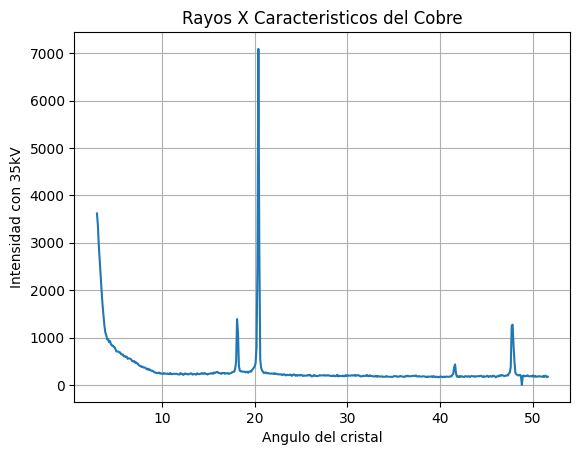

In [208]:
plt.plot(actividad1["Ángulo del crista"],actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Angulo del cristal')
plt.ylabel('Intensidad con 35kV')
plt.grid()
plt.show()

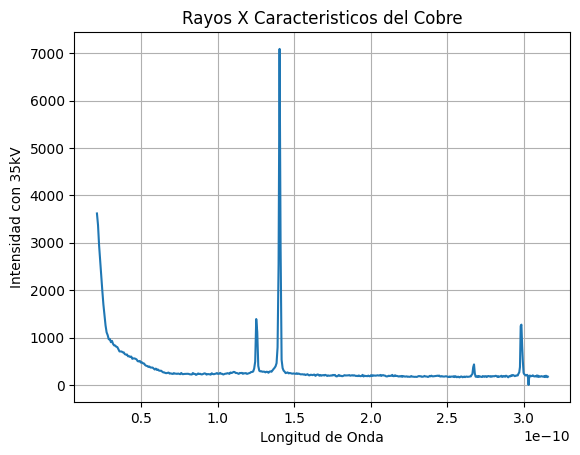

In [209]:
def ley_de_bragg(theta):
    d=2.014*10**(-10) #GUIA
    n=1 #ARBITRARIO
    lambda1=(2*d*np.sin(np.deg2rad(theta)))/n
    return lambda1
longitudes_de_onda=ley_de_bragg(actividad1['Ángulo del crista'])
plt.plot(longitudes_de_onda,actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.grid()
plt.show()

Ajuste lorentziano

Para Ka

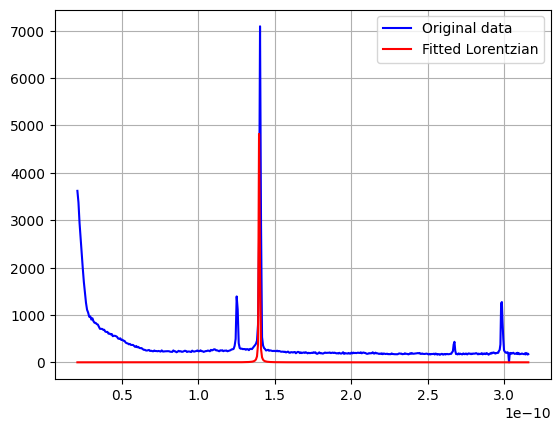

In [210]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKa=np.max(actividad1['Tasa con 35kV'])
x0 =1.4*10**(-10)
def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKa, x0, gamma)

# Ajuste con curve_fit
initial_guess = [10**(-15)]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]




fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.grid()
plt.show()


Para Kb

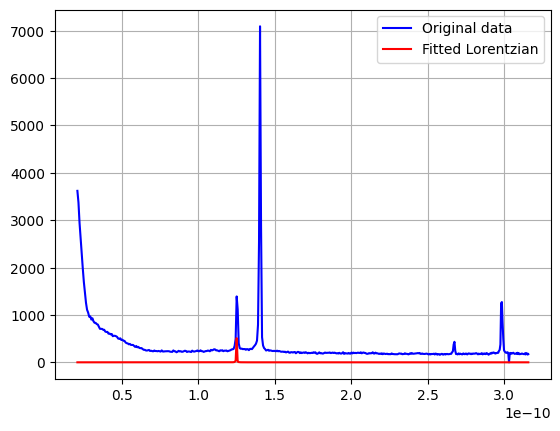

In [211]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKb=1390.
x0 = 1.25*10**(-10)

def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKb, x0, gamma)

# Ajuste con curve_fit
initial_guess = [1*10**(-500)]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]

fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.grid()
plt.show()

Ajuste de Voigth

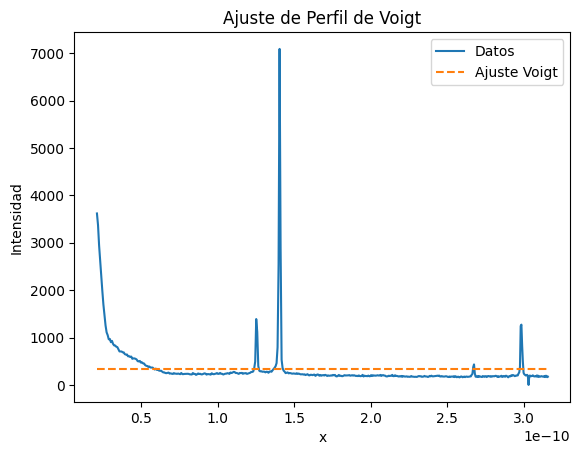

In [212]:
# Datos de ejemplo (reemplázalos con tus propios datos)
x_data = longitudes_de_onda
y_data = actividad1['Tasa con 35kV']

# Definir la función Voigt para el ajuste
def voigt(x, amplitude, center, sigma, gamma):
    return amplitude * voigt_profile(x - center, sigma, gamma)

# Adivinar parámetros iniciales para el ajuste
initial_guess = [1.0, 0.5, 1.0, 1.0*10**(-2)]

# Realizar el ajuste
params, params_covariance = curve_fit(voigt, x_data, y_data, p0=initial_guess)

# Parámetros ajustados
amplitude_fit, center_fit, sigma_fit, gamma_fit = params
"""
print(f"Amplitud ajustada: {amplitude_fit}")
print(f"Centro ajustado: {center_fit}")
print(f"Sigma ajustada: {sigma_fit}")
print(f"Gamma ajustada: {gamma_fit}")
"""
# Generar los valores ajustados con el perfil de Voigt ajustado
y_fit = voigt(x_data, *params)

# Graficar los datos y el ajuste
plt.plot(x_data, y_data, label='Datos')
plt.plot(x_data, y_fit, label='Ajuste Voigt', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.title('Ajuste de Perfil de Voigt')
plt.show()


ACTIVIDAD 2

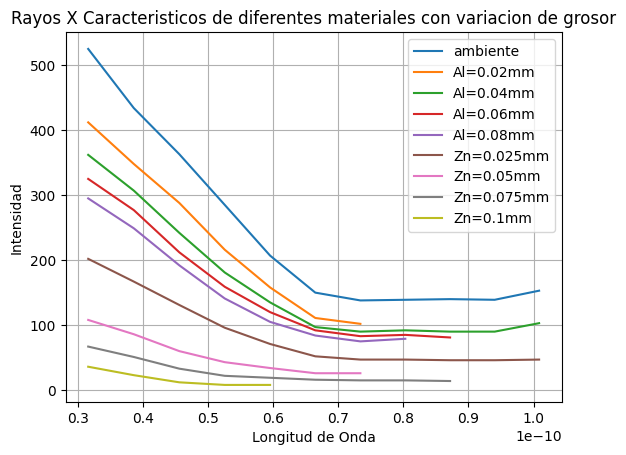

In [213]:
plt.plot()
plt.plot(ley_de_bragg(actividad2ambiente['Ángulo del crista']),actividad2ambiente['Tasa con 30kV'],label='ambiente')
plt.plot(ley_de_bragg(actividad2Al0_02['Ángulo del crista']),actividad2Al0_02['Tasa con 30kV'],label='Al=0.02mm')
plt.plot(ley_de_bragg(actividad2Al0_04['Ángulo del crista']),actividad2Al0_04['Tasa con 30kV'],label='Al=0.04mm')
plt.plot(ley_de_bragg(actividad2Al0_06['Ángulo del crista']),actividad2Al0_06['Tasa con 30kV'],label='Al=0.06mm')
plt.plot(ley_de_bragg(actividad2Al0_08['Ángulo del crista']),actividad2Al0_08['Tasa con 30kV'],label='Al=0.08mm')
plt.plot(ley_de_bragg(actividad2Zn0_025['Ángulo del crista']),actividad2Zn0_025['Tasa con 30kV'],label='Zn=0.025mm')
plt.plot(ley_de_bragg(actividad2Zn0_05['Ángulo del crista']),actividad2Zn0_05['Tasa con 30kV'],label='Zn=0.05mm')
plt.plot(ley_de_bragg(actividad2Zn0_075['Ángulo del crista']),actividad2Zn0_075['Tasa con 30kV'],label='Zn=0.075mm')
plt.plot(ley_de_bragg(actividad2Zn0_1['Ángulo del crista']),actividad2Zn0_1['Tasa con 30kV'],label='Zn=0.1mm')
plt.title('Rayos X Caracteristicos de diferentes materiales con variacion de grosor')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()

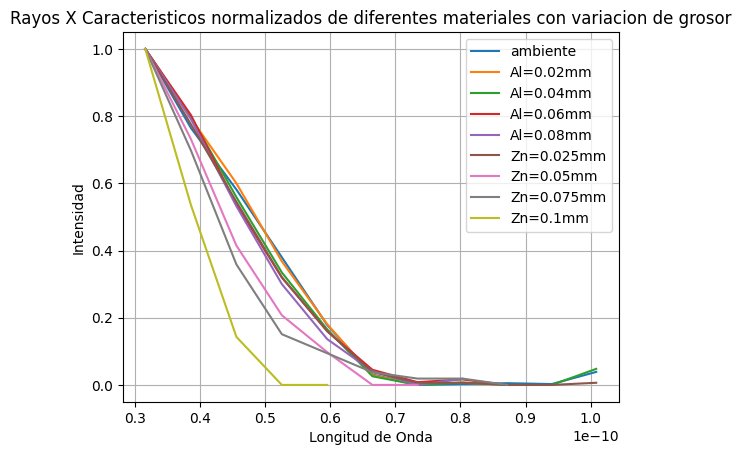

In [214]:
#normalizacion
def norm(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
plt.plot()
plt.plot(ley_de_bragg(actividad2ambiente['Ángulo del crista']),norm(actividad2ambiente['Tasa con 30kV']),label='ambiente')
plt.plot(ley_de_bragg(actividad2Al0_02['Ángulo del crista']),norm(actividad2Al0_02['Tasa con 30kV']),label='Al=0.02mm')
plt.plot(ley_de_bragg(actividad2Al0_04['Ángulo del crista']),norm(actividad2Al0_04['Tasa con 30kV']),label='Al=0.04mm')
plt.plot(ley_de_bragg(actividad2Al0_06['Ángulo del crista']),norm(actividad2Al0_06['Tasa con 30kV']),label='Al=0.06mm')
plt.plot(ley_de_bragg(actividad2Al0_08['Ángulo del crista']),norm(actividad2Al0_08['Tasa con 30kV']),label='Al=0.08mm')
plt.plot(ley_de_bragg(actividad2Zn0_025['Ángulo del crista']),norm(actividad2Zn0_025['Tasa con 30kV']),label='Zn=0.025mm')
plt.plot(ley_de_bragg(actividad2Zn0_05['Ángulo del crista']),norm(actividad2Zn0_05['Tasa con 30kV']),label='Zn=0.05mm')
plt.plot(ley_de_bragg(actividad2Zn0_075['Ángulo del crista']),norm(actividad2Zn0_075['Tasa con 30kV']),label='Zn=0.075mm')
plt.plot(ley_de_bragg(actividad2Zn0_1['Ángulo del crista']),norm(actividad2Zn0_1['Tasa con 30kV']),label='Zn=0.1mm')
plt.title('Rayos X Caracteristicos normalizados de diferentes materiales con variacion de grosor')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()


In [215]:
#Haciendo el Fit
def log_model(x, a, b):
    return a * np.log(x) + b
params, params_covariance = curve_fit(log_model, actividad2ambiente['Ángulo del crista'], norm(actividad2ambiente['Tasa con 30kV']))
a_fit, b_fit = params
print('Ambiente')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_02['Ángulo del crista'], norm(actividad2Al0_02['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.02mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_04['Ángulo del crista'], norm(actividad2Al0_04['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.04mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_06['Ángulo del crista'], norm(actividad2Al0_06['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.06mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_08['Ángulo del crista'], norm(actividad2Al0_08['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.08mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_025['Ángulo del crista'], norm(actividad2Zn0_025['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.025mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_05['Ángulo del crista'], norm(actividad2Zn0_05['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.05mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_075['Ángulo del crista'], norm(actividad2Zn0_075['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.075mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_1['Ángulo del crista'], norm(actividad2Zn0_1['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.12mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")



Ambiente
Coeficiente a ajustado: -0.8899240431229954
Coeficiente b ajustado: 2.2196995627355416
Al 0.02mm
Coeficiente a ajustado: -1.2682624800743953
Coeficiente b ajustado: 2.9316455204191434
Al 0.04mm
Coeficiente a ajustado: -0.8884116079266814
Coeficiente b ajustado: 2.212115892739476
Al 0.06mm
Coeficiente a ajustado: -1.0589589751892678
Coeficiente b ajustado: 2.533831817412669
Al 0.08mm
Coeficiente a ajustado: -1.1519858799111768
Coeficiente b ajustado: 2.696651967331191
Zn 0.025mm
Coeficiente a ajustado: -0.8888253997922827
Coeficiente b ajustado: 2.205883145657258
Zn 0.05mm
Coeficiente a ajustado: -1.2525278503406359
Coeficiente b ajustado: 2.8262900649255736
Al 0.075mm
Coeficiente a ajustado: -0.9636476952212683
Coeficiente b ajustado: 2.277782698620825
Zn 0.12mm
Coeficiente a ajustado: -1.6465097637863777
Coeficiente b ajustado: 3.3770143632833527


ACTIVIDAD 3 

Corriente constante

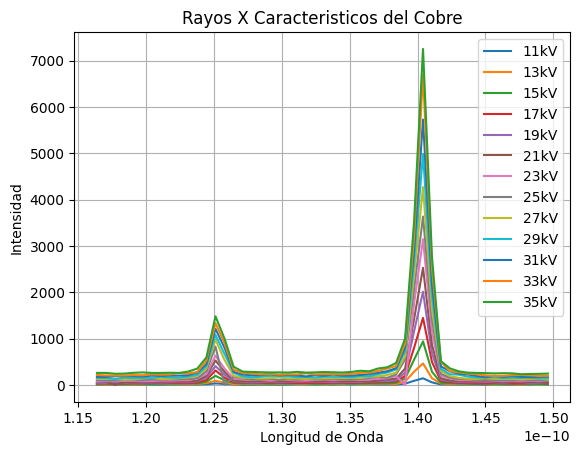

In [216]:
longitudes_de_onda=ley_de_bragg(actividad3a['?ngulo del crista'])
plt.plot(longitudes_de_onda,actividad3a['Tasa con 11kV'],label='11kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 13kV'],label='13kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 15kV'],label='15kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 17kV'],label='17kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 19kV'],label='19kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 21kV'],label='21kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 23kV'],label='23kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 25kV'],label='25kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 27kV'],label='27kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 29kV'],label='29kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 31kV'],label='31kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 33kV'],label='33kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 35kV'],label='35kV')

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()

In [221]:
i_ka = np.argmax(actividad3a['Tasa con 11kV']) 
i_kb = 22
Ka=[]
Kb=[]

Ka11=actividad3a['Tasa con 11kV'][i_ka]
Ka.append([Ka11,11])
Ka13=actividad3a['Tasa con 13kV'][i_ka]
Ka.append([Ka13,13])
Ka15=actividad3a['Tasa con 15kV'][i_ka]
Ka.append([Ka15,15])
Ka17=actividad3a['Tasa con 17kV'][i_ka]
Ka.append([Ka17,17])
Ka19=actividad3a['Tasa con 19kV'][i_ka]
Ka.append([Ka19,19])
Ka21=actividad3a['Tasa con 21kV'][i_ka]
Ka.append([Ka21,21])
Ka23=actividad3a['Tasa con 23kV'][i_ka]
Ka.append([Ka23,23])
Ka25=actividad3a['Tasa con 25kV'][i_ka]
Ka.append([Ka25,25])
Ka27=actividad3a['Tasa con 27kV'][i_ka]
Ka.append([Ka27,27])
Ka29=actividad3a['Tasa con 29kV'][i_ka]
Ka.append([Ka29,29])
Ka31=actividad3a['Tasa con 31kV'][i_ka]
Ka.append([Ka31,31])
Ka33=actividad3a['Tasa con 33kV'][i_ka]
Ka.append([Ka33,33])
Ka35=actividad3a['Tasa con 35kV'][i_ka]
Ka.append([Ka35,35])

Kb11=actividad3a['Tasa con 11kV'][i_kb]
Kb.append([Kb11,11])
Kb13=actividad3a['Tasa con 13kV'][i_kb]
Kb.append([Kb13,13])
Kb15=actividad3a['Tasa con 15kV'][i_kb]
Kb.append([Kb15,15])
Kb17=actividad3a['Tasa con 17kV'][i_kb]
Kb.append([Kb17,17])
Kb19=actividad3a['Tasa con 19kV'][i_kb]
Kb.append([Kb19,19])
Kb21=actividad3a['Tasa con 21kV'][i_kb]
Kb.append([Kb21,21])
Kb23=actividad3a['Tasa con 23kV'][i_kb]
Kb.append([Kb23,23])
Kb25=actividad3a['Tasa con 25kV'][i_kb]
Kb.append([Kb25,25])
Kb27=actividad3a['Tasa con 27kV'][i_kb]
Kb.append([Kb27,27])
Kb29=actividad3a['Tasa con 29kV'][i_kb]
Kb.append([Kb29,29])
Kb31=actividad3a['Tasa con 31kV'][i_kb]
Kb.append([Kb31,31])
Kb33=actividad3a['Tasa con 33kV'][i_kb]
Kb.append([Kb33,33])
Kb35=actividad3a['Tasa con 35kV'][i_kb]
Kb.append([Kb35,35])










[[143, 1.3908611455660976e-10]] 20.2 36


'\nintensidad_sin_primer_maximo = np.delete(actividad3a, indice_primer_maximo)\nsegundo_maximo = np.max(intensidad_sin_primer_maximo)  # El segundo valor máximo\n'

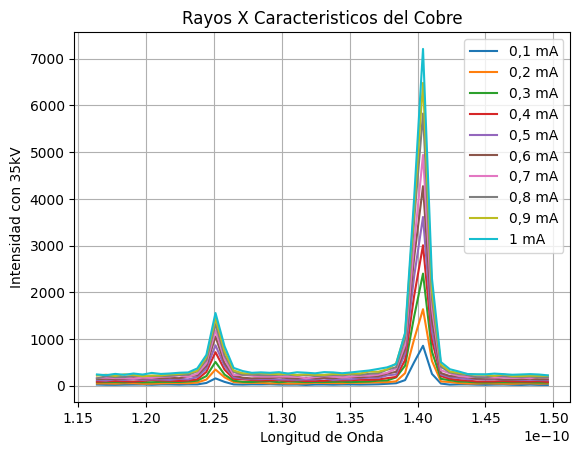

In [165]:
longitudes_de_onda=ley_de_bragg(actividad3b_01['ﾁngulo del crista'])
plt.plot(longitudes_de_onda,actividad3b_01['Tasa con 35kV'],label='0,1 mA')
plt.plot(longitudes_de_onda,actividad3b_02['Tasa con 35kV'],label='0,2 mA')
plt.plot(longitudes_de_onda,actividad3b_03['Tasa con 35kV'],label='0,3 mA')
plt.plot(longitudes_de_onda,actividad3b_04['Tasa con 35kV'],label='0,4 mA')
plt.plot(longitudes_de_onda,actividad3b_05['Tasa con 35kV'],label='0,5 mA')
plt.plot(longitudes_de_onda,actividad3b_06['Tasa con 35kV'],label='0,6 mA')
plt.plot(longitudes_de_onda,actividad3b_07['Tasa con 35kV'],label='0,7 mA')
plt.plot(longitudes_de_onda,actividad3b_08['Tasa con 35kV'],label='0,8 mA')
plt.plot(longitudes_de_onda,actividad3b_09['Tasa con 35kV'],label='0,9 mA')
plt.plot(longitudes_de_onda,actividad3b_1['Tasa con 35kV'],label='1 mA')

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.legend()
plt.grid()
plt.show()

ACTIVIDAD 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


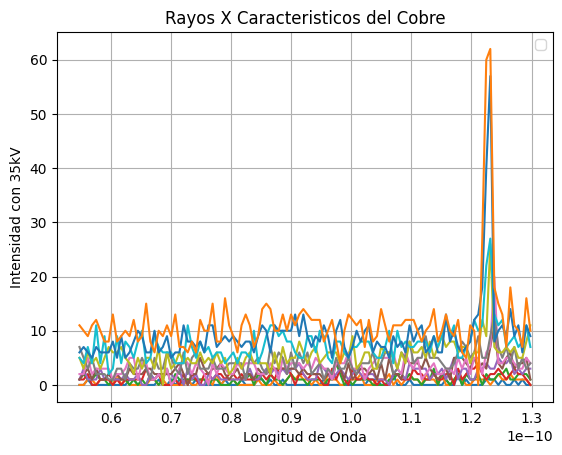

In [166]:
longitudes_de_onda=ley_de_bragg(actividad4['?ngulo del crista'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 13kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 15kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 17kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 19kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 21kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 23kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 25kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 27kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 29kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 31kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 33kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.legend()
plt.grid()
plt.show()

In [167]:
Jadnaifn

NameError: name 'Jadnaifn' is not defined